In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
dftrain=pd.read_csv('/kaggle/input/titanic/train.csv')
dftest=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
null_values=dftrain.isnull().sum()   #get notal number of null values is each column
percentage=dftrain.isnull().sum()/dftrain.isnull().count()*100 # get percentage of null values wrt total number of data points. dftrain.isnull().count() gives total number of data points in each column
percentage=round(percentage,1) #round off

missing_data=pd.concat([null_values,percentage],axis=1,keys=['Total','Percentage']) #combine into one dataframe

print("Null values")
print(missing_data)

Null values
             Total  Percentage
PassengerId      0         0.0
Survived         0         0.0
Pclass           0         0.0
Name             0         0.0
Sex              0         0.0
Age            177        19.9
SibSp            0         0.0
Parch            0         0.0
Ticket           0         0.0
Fare             0         0.0
Cabin          687        77.1
Embarked         2         0.2


In [6]:
dftrain['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
#handling null values

data=[dftrain,dftest]

for dataset in data:
    #filling missing values in Age
    mean=dataset['Age'].mean()
    std=dataset['Age'].std()
    null_val=dataset['Age'].isnull().sum()  #get number of null values

    age_fil=np.random.randint(mean-std,mean+std,size=null_val)  #create a list to store random values. Length of list--> no of null values

    age_col=dataset['Age'].copy()
    age_col[np.isnan(age_col)]=age_fil #assign random age value if the age value is NaN

    dataset['Age']=age_col
    
    #filling null values in Embarked
    dataset['Embarked']=dataset['Embarked'].fillna('S')  #S is the most occured embarked town. Since there are only 2 missing values,we can fill it with most occured value
    
    #filling null values in cabin type
    dataset['Cabin']=dataset['Cabin'].fillna('N') #fill missing cabin values with N
    dataset['Cabin_type']=dataset['Cabin'].apply(lambda x: x[0]) #create new feature to identify the first letter of the cabin, which actually repressent the cabin number

In [8]:
#extract designation form the name

data=[dftrain, dftest]

for dataset in data:
    dataset['Name']=dataset["Name"].apply(lambda x: x.split(',')[1].split('.')[0])

In [9]:
dftrain['Name'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Name, dtype: int64

<AxesSubplot:xlabel='Name', ylabel='Survived'>

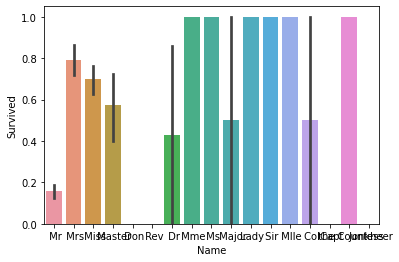

In [10]:
sns.barplot(x='Name',y='Survived',data=dftrain)

In [11]:
dftest['Name'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Name, dtype: int64

In [12]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,N,S,N
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,N
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,N,S,N


In [13]:
#drop unwatend columns

dftrain_new =dftrain.drop(columns=['PassengerId','Survived','Ticket','Fare','Cabin'], axis=1)
dftest_new =dftest.drop(columns=['PassengerId','Ticket','Fare','Cabin'], axis=1)

#train results
predictions=dftrain['Survived']

In [14]:
#encoding catagorical columns using one hot encoding
training=pd.get_dummies(dftrain_new,drop_first=False)
#test=pd.get_dummies(dftest_new,drop_first=False)

In [15]:
x_train,x_test=train_test_split(training,test_size=0.2)
y_train,y_test=train_test_split(predictions,test_size=0.2)

In [16]:
#LOGISTIC REGRESSION
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
train_accuracy=round(log_reg.score(x_train,y_train)*100,2)
test_accuracy=round(log_reg.score(x_test,y_test)*100,2)

print("Train Accuracy: "+str(train_accuracy))
print("Test Accuracy: "+str(test_accuracy))

Train Accuracy: 61.66
Test Accuracy: 63.13


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
#RANDOM FOREST
rand_forest=RandomForestClassifier(n_estimators=100)
rand_forest.fit(x_train,y_train)
train_accuracy=round(rand_forest.score(x_train,y_train)*100,2)
test_accuracy=round(rand_forest.score(x_test,y_test)*100,2)

print("Train Accuracy: "+str(train_accuracy))
print("Test Accuracy: "+str(test_accuracy))

Train Accuracy: 89.61
Test Accuracy: 59.22


In [18]:
#STOCHASTIC GRADIENT DESCENT
sgd=SGDClassifier(max_iter=5,tol=None)
sgd.fit(x_train,y_train)
train_accuracy=round(sgd.score(x_train,y_train)*100,2)
test_accuracy=round(sgd.score(x_test,y_test)*100,2)

print("Train Accuracy: "+str(train_accuracy))
print("Test Accuracy: "+str(test_accuracy))

Train Accuracy: 61.1
Test Accuracy: 65.36


In [19]:
#K NEAREST NEIHBOR
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
train_accuracy=round(knn.score(x_train,y_train)*100,2)
test_accuracy=round(knn.score(x_test,y_test)*100,2)

print("Train Accuracy: "+str(train_accuracy))
print("Test Accuracy: "+str(test_accuracy))

Train Accuracy: 71.63
Test Accuracy: 52.51


In [20]:
#NAIVE BAYES
nb=GaussianNB()
nb.fit(x_train,y_train)
train_accuracy=round(nb.score(x_train,y_train)*100,2)
test_accuracy=round(nb.score(x_test,y_test)*100,2)

print("Train Accuracy: "+str(train_accuracy))
print("Test Accuracy: "+str(test_accuracy))

Train Accuracy: 40.87
Test Accuracy: 34.64


In [21]:
#PERCEPTRON
perceptron=Perceptron(max_iter=5)
perceptron.fit(x_train,y_train)
train_accuracy=round(perceptron.score(x_train,y_train)*100,2)
test_accuracy=round(perceptron.score(x_test,y_test)*100,2)

print("Train Accuracy: "+str(train_accuracy))
print("Test Accuracy: "+str(test_accuracy))

Train Accuracy: 60.67
Test Accuracy: 65.36


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [22]:
#LINEAR SVM
linear_svc=LinearSVC()
linear_svc.fit(x_train,y_train)
train_accuracy=round(linear_svc.score(x_train,y_train)*100,2)
test_accuracy=round(linear_svc.score(x_test,y_test)*100,2)

print("Train Accuracy: "+str(train_accuracy))
print("Test Accuracy: "+str(test_accuracy))

Train Accuracy: 60.81
Test Accuracy: 62.57


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [23]:
#DECISION TREE
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
train_accuracy=round(decision_tree.score(x_train,y_train)*100,2)
test_accuracy=round(decision_tree.score(x_test,y_test)*100,2)

print("Train Accuracy: "+str(train_accuracy))
print("Test Accuracy: "+str(test_accuracy))

Train Accuracy: 89.61
Test Accuracy: 58.1
